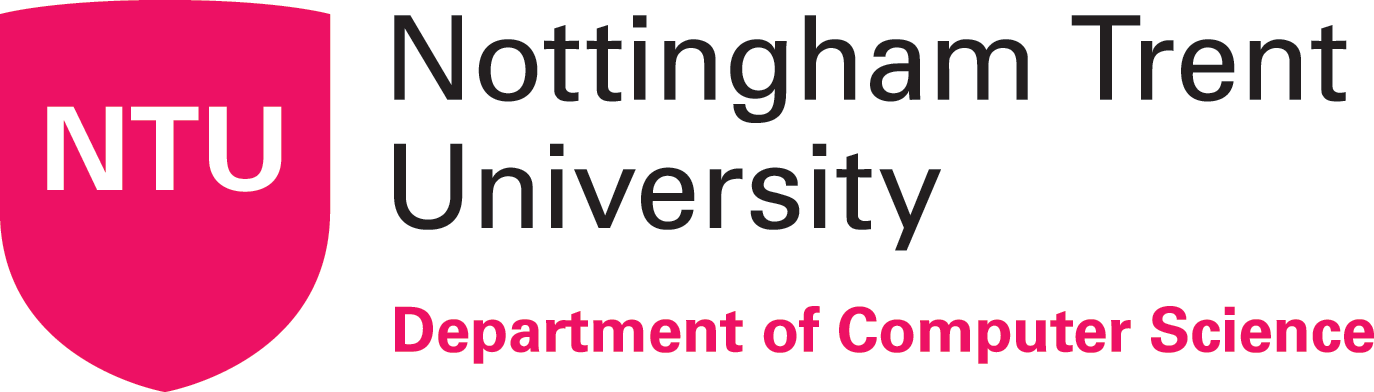

# SOFT40161 - Introduction to Computer Programming
# Submission of the Coursework

## Name: Ruth Amey
## NTU ID: N1019812 

<font  color= 'red'> **The Full description of the Coursework is here -** </font>

<a href="https://now.ntu.ac.uk/d2l/le/content/1037562/viewContent/13280440/View">SOFT40161-Coursework (Click here)</a>

At least 3-4 things for each part showing skills basically

dataset = https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric?select=METABRIC_RNA_Mutation.csv

# 

Github Link: <a href="https://github.com/Ruthamey1/CP_COURSEWORK">(Click here)</a>

# Section 1: Control Structures (16 marks)


In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

In [78]:
# Explanation and Documentation 

This is a binar classification problem where i will be investigating whether the patient survives (1) or not (0).

In [79]:
#Import data from kaggle

path = kagglehub.dataset_download("raghadalharbi/breast-cancer-gene-expression-profiles-metabric")

print("Path to dataset files:", path)

Path to dataset files: /Users/ruthamey/.cache/kagglehub/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric/versions/1


In [80]:
#Reading csv file
data = pd.read_csv(f'{path}/METABRIC_RNA_Mutation.csv')
data.head()

/var/folders/fy/p_zfmrqj0yn93nq3xwgxytjw0000gn/T/ipykernel_48491/4176210724.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f'{path}/METABRIC_RNA_Mutation.csv')


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [81]:
print(data.shape)

(1904, 693)


The shape of the data shows there are 1904 entries with 693 features, these features are a mix of clinical attributes which are the first 31 columns and genetic attributes being the other 662 columns I am only going to focus on the clinical attributes so first i will remove the genetic columns

In [82]:
clinical_attributes = data.iloc[:, 0:31]
clinical_attributes.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


This is still a lot of features to analyse so am reducing to the features I deem most important

In [83]:
clinical_attributes['cancer_type'].value_counts()

cancer_type
Breast Cancer     1903
Breast Sarcoma       1
Name: count, dtype: int64

In [84]:
for row in range(len(clinical_attributes)):
    if clinical_attributes.loc[row, 'cancer_type']=='Breast Sarcoma':
        print(row)

170


This is a feature I would of deemed important but as there is only one value for breast sarcoma I have decided to remove the value as there is not enough data to give us any information on breast sarcomas which is of value.

In [85]:
clinical_attributes = clinical_attributes.drop(170)
clinical_attributes = clinical_attributes.reset_index()

In [86]:
features_to_keep = ['age_at_diagnosis', 'type_of_breast_surgery', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
                    'primary_tumor_laterality', 'lymph_nodes_examined_positive', 'overall_survival_months', 'overall_survival',
                    'tumor_size', 'tumor_stage']
data = pd.DataFrame()

for feature in features_to_keep:
    data[feature] = clinical_attributes.loc[:, feature]

data.head()

,age_at_diagnosis,type_of_breast_surgery,cancer_type_detailed,cellularity,chemotherapy,primary_tumor_laterality,lymph_nodes_examined_positive,overall_survival_months,overall_survival,tumor_size,tumor_stage
0,75.65,MASTECTOMY,Breast Invasive Ductal Carcinoma,NaN,0,Right,10.0,140.500000,1,22.0,2.0
1,43.19,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,High,0,Right,0.0,84.633333,1,10.0,1.0
2,48.87,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,1,Right,1.0,163.700000,0,15.0,2.0
3,47.68,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,Right,3.0,164.933333,1,25.0,2.0
4,76.97,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,High,1,Right,8.0,41.366667,0,40.0,2.0


In [87]:
#Basic Statistics of each numerical features
data.describe()

,age_at_diagnosis,chemotherapy,lymph_nodes_examined_positive,overall_survival_months,overall_survival,tumor_size,tumor_stage
count,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1884.000000,1403.000000
mean,61.092133,0.208092,2.003153,125.187073,0.420389,26.238726,1.750535
std,12.980229,0.406050,4.080807,76.300265,0.493751,15.160976,0.628999
min,21.930000,0.000000,0.000000,0.100000,0.000000,1.000000,0.000000
25%,51.370000,0.000000,0.000000,60.883333,0.000000,17.000000,1.000000
50%,61.780000,0.000000,0.000000,115.633333,0.000000,23.000000,2.000000
75%,70.595000,0.000000,2.000000,184.733333,1.000000,30.000000,2.000000
max,96.290000,1.000000,45.000000,355.200000,1.000000,182.000000,4.000000


In [88]:
#categorical features
categorical = data.select_dtypes(include=[object])
#Numerical features
numerical = data.select_dtypes(exclude=object)


In [89]:
for category in categorical:
    print(data[category].value_counts())
    print()
    

type_of_breast_surgery
MASTECTOMY           1127
BREAST CONSERVING     755
Name: count, dtype: int64

cancer_type_detailed
Breast Invasive Ductal Carcinoma             1499
Breast Mixed Ductal and Lobular Carcinoma     207
Breast Invasive Lobular Carcinoma             142
Breast Invasive Mixed Mucinous Carcinoma       22
Breast                                         17
Metaplastic Breast Cancer                       1
Name: count, dtype: int64

cellularity
High        939
Moderate    710
Low         200
Name: count, dtype: int64

primary_tumor_laterality
Left     935
Right    863
Name: count, dtype: int64



In [90]:
Death_under_age_25 = data[(data['overall_survival']==0)&(data['age_at_diagnosis'] < 25)]
Death_under_age_25

,age_at_diagnosis,type_of_breast_surgery,cancer_type_detailed,cellularity,chemotherapy,primary_tumor_laterality,lymph_nodes_examined_positive,overall_survival_months,overall_survival,tumor_size,tumor_stage
718,21.93,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,High,1,Right,6.0,38.8,0,35.0,3.0


In [91]:
#Going to split into 3 categories
#https://www.komen.org/breast-cancer/diagnosis/stages-staging/tumor-size/
#Small < 20
# Medium <50 & >20
#Large > 50 

for row in range(len(data)):
    if data.loc[row, 'tumor_size'] < 20:
        data.loc[row, 'tumor_size_category'] = 'Small'
    elif data.loc[row, 'tumor_size'] >= 20 and data.loc[row, 'tumor_size'] < 50:
        data.loc[row, 'tumor_size_category'] = 'Medium' 
    elif data.loc[row, 'tumor_size'] >= 50:
        data.loc[row, 'tumor_size_category'] = 'Large'
    else:
        data.loc[row, 'tumor_size_category'] = np.nan

In [92]:
data['tumor_size_category'].value_counts()

tumor_size_category
Medium    1150
Small      592
Large      142
Name: count, dtype: int64

In [93]:
# Reflection on results 

# Section 2: Functions and Modules (16 marks)  

In [94]:
# Explanation and Documentation 

In [95]:
def mean_survival(numerical_feature):
    try:
        mean = data.groupby('overall_survival')[numerical_feature].mean()
        print(f'The mean survival for {numerical_feature} is:')
        print(mean)
    except ValueError:
        print('Enter a numerical feature')

mean_survival('tumor_size')

The mean survival for tumor_size is:
overall_survival
0    28.364945
1    23.319861
Name: tumor_size, dtype: float64


In [96]:
import numpy as np
# This function helps us to see if there is a correlation between two numerical features
#If there is then both features are not needed as they are presenting the same information
def correlation(feature1, feature2):
    try:
        cor = np.corrcoef(data[feature1].values, data[feature2].values)[0,1]
        print(f'The correlation between {feature1} and {feature2} is {cor:.3f}')
    except ValueError:
        print('Enter numerical features')
    if cor >= 0.5 or cor <= -0.5:
        print('Features show a correlation')
        print('Further investigation is needed')

In [97]:
correlation('age_at_diagnosis', 'lymph_nodes_examined_positive')

The correlation between age_at_diagnosis and lymph_nodes_examined_positive is -0.007


There is a very low correlation so showing different information

In [98]:
correlation('overall_survival_months', 'overall_survival')

The correlation between overall_survival_months and overall_survival is 0.386


In [99]:
#The t-test helps if there is a high correlation between two groups this can be used to see if any significant difference
import scipy.stats as stats

def one_sample_ttest(feature1, population_mean):
    stat = stats.ttest_1samp(data[feature1], population_mean)
    ci = stat.confidence_interval(confidence_level=0.95)
    print(f'The T-stat is {stat.statistic:.2f} with p value {stat.pvalue:.2f}')
    print(f'The confidence interval is between {ci.low:.2f} and {ci.high:.2f}')

one_sample_ttest('age_at_diagnosis', 55)

The T-stat is 20.47 with p value 0.00
The confidence interval is between 60.51 and 61.68


https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/7-t-tests

These statistics show that the sample mean is higher than the population mean as the T-stat is positive, with the true mean age at diagnosis being between 60.51 and 61.68 years of age

In [100]:
one_sample_ttest('overall_survival_months', 100)

The T-stat is 14.40 with p value 0.00
The confidence interval is between 121.76 and 128.62


In [101]:
data['tumor_size'].min()

np.float64(1.0)

In [109]:
!pip install pandoc

  Preparing metadata (setup.py) ... done
  Created wheel for pandoc: filename=pandoc-2.4-py3-none-any.whl size=34792 sha256=707bf49fd756ddd5c4243e1960cbb26744f475617146c7310081ec032b7f0adc
  Stored in directory: /Users/ruthamey/Library/Caches/pip/wheels/9c/2f/9f/b1aac8c3e74b4ee327dc8c6eac5128996f9eadf586e2c0ba67
Successfully built pandoc


In [102]:
from sklearn.preprocessing import OrdinalEncoder

def ordinal(data, feature, *args):
    model = OrdinalEncoder(categories = [list(args)])
    data[feature]= model.fit_transform(data[[feature]])

In [103]:
ordinal(data, 'tumor_size_category', 'Small', 'Medium', 'Large', np.nan)
ordinal(data, 'cellularity', 'Low', 'Moderate', 'High', np.nan)

This has sorted the categories with order however the rest of the categories will use get dummies which is one hot coding which will be used once th emissing values hve been filled in

In [112]:
# Reflection on results 

In [ ]:
#ideas maybe could use random or math?

# Section 3: Data Handling with Pandas (16 marks)  

In [323]:
# Explanation and Documentation 

In [324]:
#See if any data is duplicated
print(data.duplicated().sum())

0


In [325]:
#Removing duplicates
#data = data.drop_duplicates()

In [326]:
#See if any data is missing
data.isna().sum()

age_at_diagnosis                   0
type_of_breast_surgery            21
cancer_type_detailed              15
cellularity                       54
chemotherapy                       0
primary_tumor_laterality         105
lymph_nodes_examined_positive      0
overall_survival_months            0
overall_survival                   0
tumor_size                        19
tumor_stage                      500
dtype: int64

As the categorical features are only missing a few values I have decided it is best to fill these in with the most common category within that column so information is not lost from dropping the column

In [327]:
for feature in categorical:
    data[feature] = data[feature].fillna(data[feature].mode()[0])

In [328]:
data.isna().sum()

age_at_diagnosis                   0
type_of_breast_surgery             0
cancer_type_detailed               0
cellularity                        0
chemotherapy                       0
primary_tumor_laterality           0
lymph_nodes_examined_positive      0
overall_survival_months            0
overall_survival                   0
tumor_size                        19
tumor_stage                      500
dtype: int64

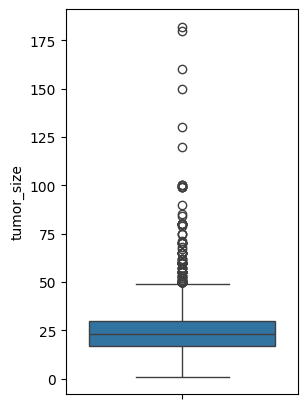

In [329]:
plt.figure(figsize=(3,5))

sns.boxplot(data=data, y='tumor_size')

plt.show()

As there are a lot of outliers I have decided to fill in the missing values for tumour size with the median.
For tumor stage there a lot of values missing, with what stage cancer you have beeing a huge factoir into survival rates I do not want to fill this with the mean or median distorting the results. Therefore akthough it is losing data the data is large enough to still have a good proportion of information so have deciding to drop the column.

In [330]:
data['tumor_size'] = data['tumor_size'].fillna(data['tumor_size'].median())

In [331]:
data = data.dropna()

In [332]:
data = data.reset_index()

In [333]:
categorical

,type_of_breast_surgery,cancer_type_detailed,cellularity,primary_tumor_laterality
0,MASTECTOMY,Breast Invasive Ductal Carcinoma,NaN,Right
1,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,High,Right
2,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,Right
3,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Right
4,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,High,Right
...,...,...,...,...
1898,BREAST CONSERVING,Breast Invasive Lobular Carcinoma,High,Right
1899,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,NaN
1900,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,Left
1901,MASTECTOMY,Breast Invasive Ductal Carcinoma,Moderate,NaN


In [334]:
categorical['cancer_type_detailed'].value_counts()

cancer_type_detailed
Breast Invasive Ductal Carcinoma             1499
Breast Mixed Ductal and Lobular Carcinoma     207
Breast Invasive Lobular Carcinoma             142
Breast Invasive Mixed Mucinous Carcinoma       22
Breast                                         17
Metaplastic Breast Cancer                       1
Name: count, dtype: int64

In [336]:
categorical.loc[170, 'cancer_type_detailed']

'Breast Invasive Ductal Carcinoma'

In [360]:
miscategorised = []
mode = data['cancer_type_detailed'].mode()[0]
for row in range(len(categorical)):
    if categorical.loc[row, 'cancer_type_detailed']=='Breast':
        miscategorised.append(row)

for value in miscategorised:
    data.loc[value, 'cancer_type_detailed'] = mode

In [ ]:
# Reflection on results 

# Section 4: Data Visualization (16 marks)  

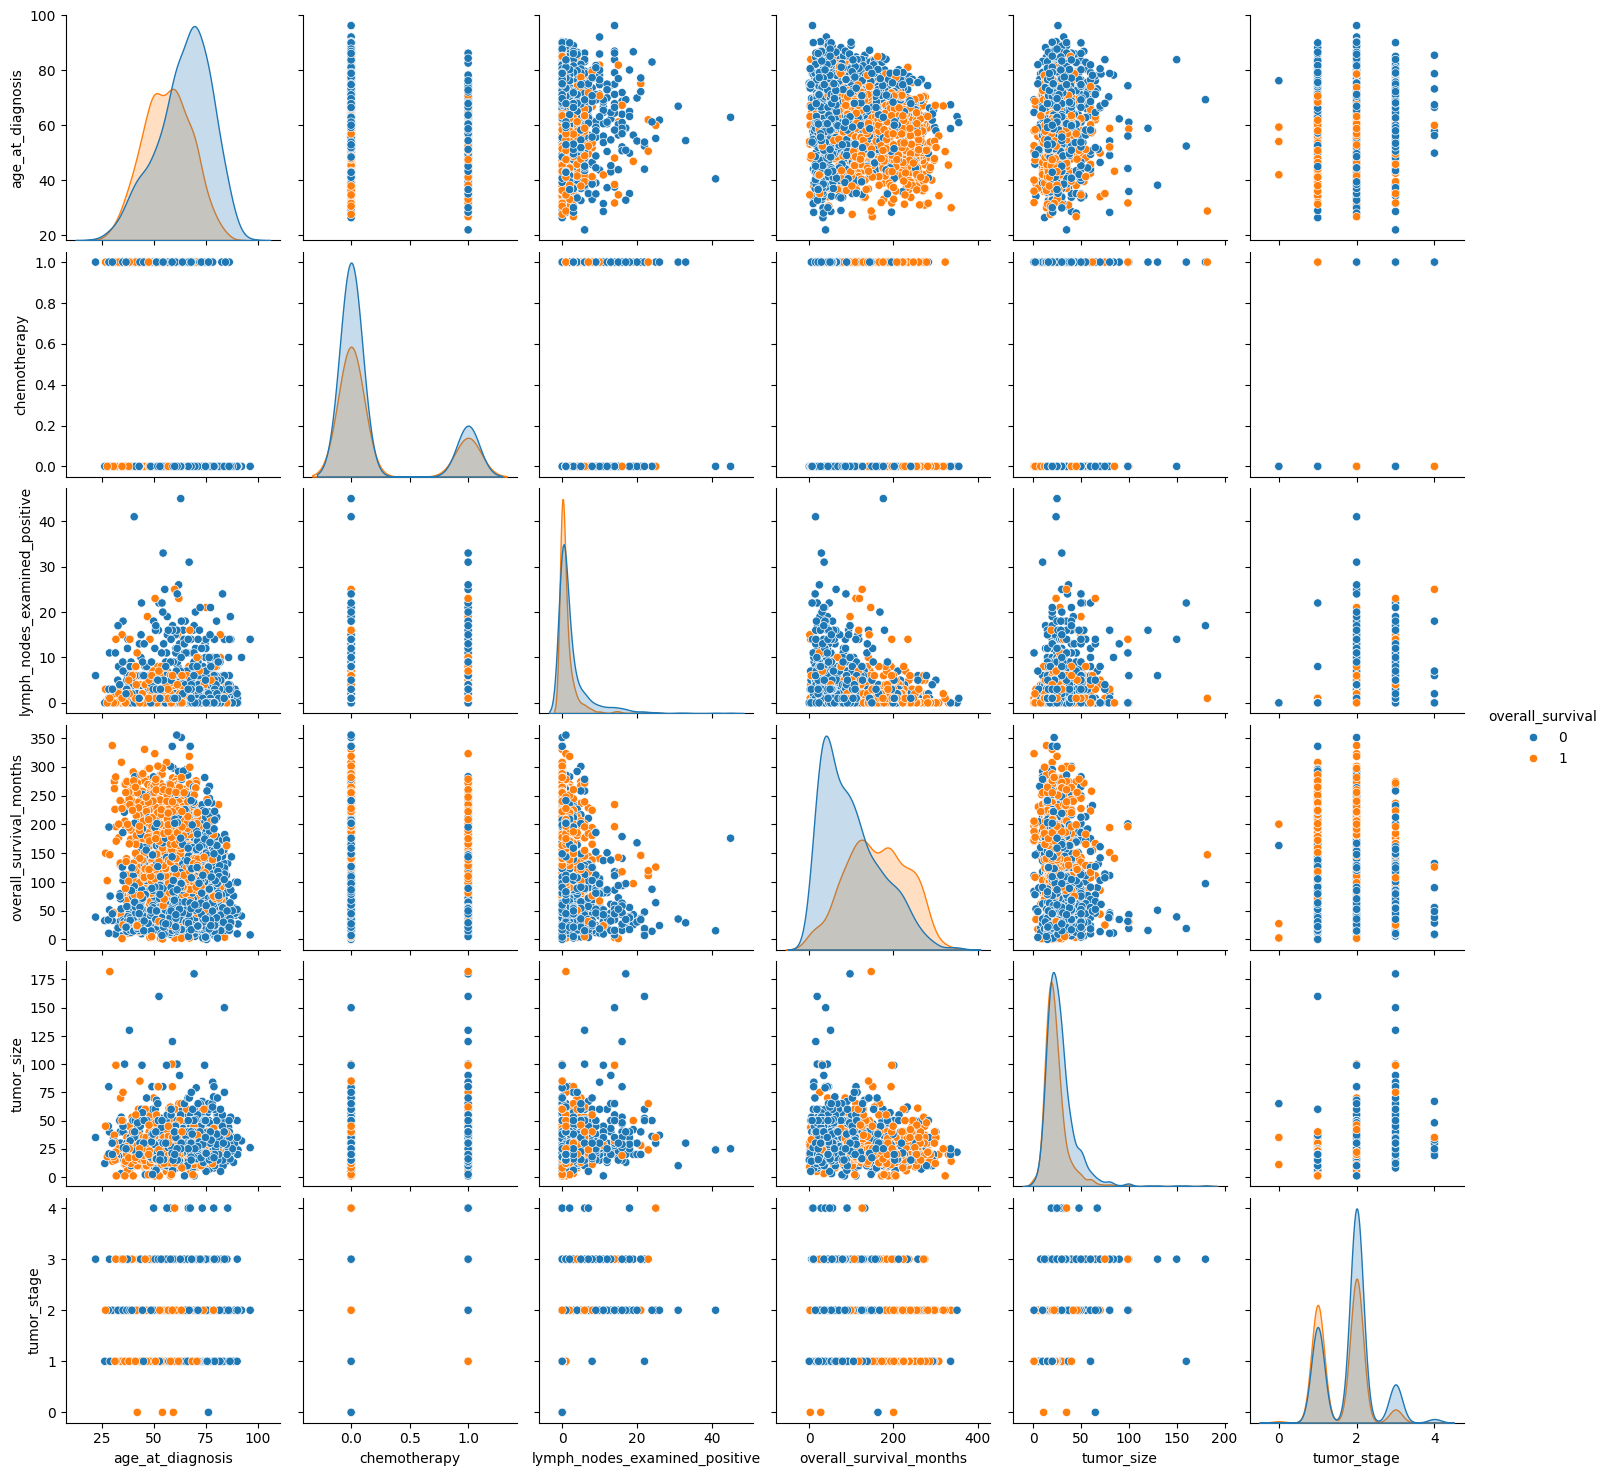

In [362]:
# Explanation and Documentation 
sns.pairplot(data, hue='overall_survival')

In [363]:
data.head()

,age_at_diagnosis,type_of_breast_surgery,cancer_type_detailed,cellularity,chemotherapy,primary_tumor_laterality,lymph_nodes_examined_positive,overall_survival_months,overall_survival,tumor_size,tumor_stage
0,75.65,MASTECTOMY,Breast Invasive Ductal Carcinoma,NaN,0,Right,10.0,140.500000,1,22.0,2.0
1,43.19,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,High,0,Right,0.0,84.633333,1,10.0,1.0
2,48.87,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,1,Right,1.0,163.700000,0,15.0,2.0
3,47.68,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,Right,3.0,164.933333,1,25.0,2.0
4,76.97,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,High,1,Right,8.0,41.366667,0,40.0,2.0


<Axes: xlabel='tumor_stage', ylabel='age_at_diagnosis'>

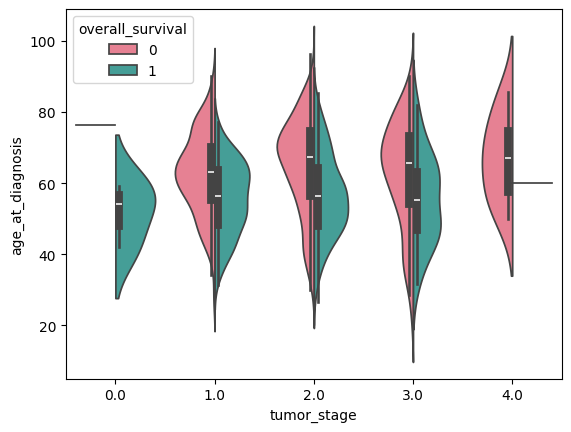

In [364]:
sns.violinplot(x='tumor_stage', y='age_at_diagnosis', data=data, hue='overall_survival', split=True, palette='husl')

<Axes: xlabel='primary_tumor_laterality', ylabel='age_at_diagnosis'>

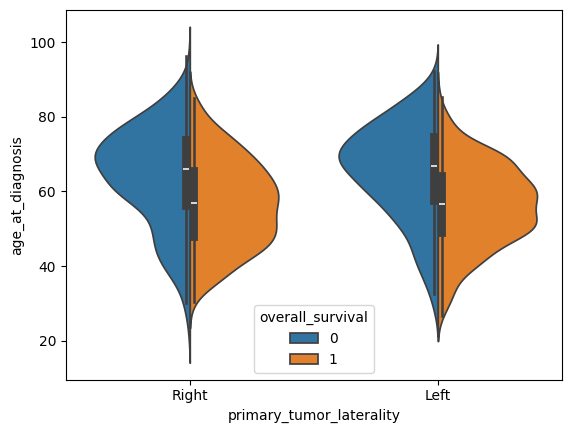

In [365]:
sns.violinplot(x='primary_tumor_laterality', y='age_at_diagnosis', data=data, hue='overall_survival', split=True)

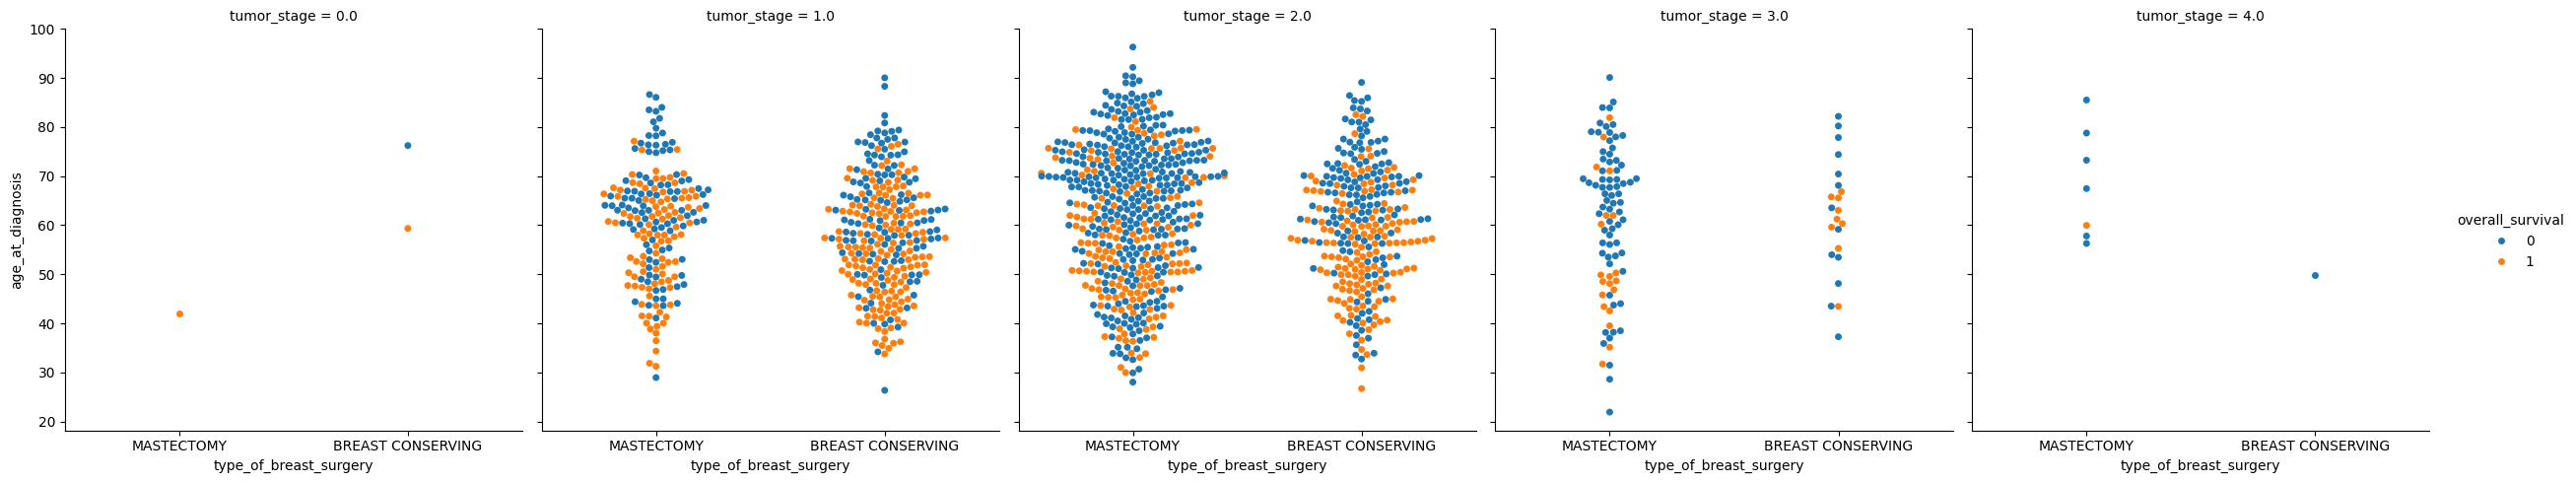

In [370]:
sns.catplot(data=data, kind='swarm', x='type_of_breast_surgery', y='age_at_diagnosis',hue='overall_survival', col='tumor_stage') 

In [ ]:
# Reflection on results 

# Section 5: GUI Development (16 marks)  

In [ ]:
# Explanation and Documentation 

In [ ]:
# Reflection on results 

# Section 6: Conclusion: Version Control, Critical Appraisal, Documentation (20 marks)  

In [ ]:
# Explanation and Documentation 

# References:


# Appendix:

(If any)